In [32]:
#뉴스 분류별 카운터
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action='ignore') 

In [33]:
df = pd.read_csv('../assets/data/game_trend.csv') 

df.sort_values(by=['언론사'], axis=0, inplace=True)
group_df=df.groupby('언론사')
group_df.count()

,뉴스 식별자,일자,기고자,제목,통합 분류1,통합 분류2,통합 분류3,사건/사고 분류1,사건/사고 분류2,사건/사고 분류3,인물,위치,기관,키워드,특성추출(가중치순 상위 50개),본문,URL,분석제외 여부
언론사,,,,,,,,,,,,,,,,,,
KBS,186,186,179,186,186,159,129,23,1,0,134,161,176,186,186,186,186,47
MBC,96,96,89,96,96,79,69,15,1,0,64,85,90,96,96,96,96,2
OBS,22,22,22,22,22,18,12,4,2,1,13,21,22,22,22,22,22,2
SBS,62,62,53,62,62,56,44,7,2,0,49,55,57,62,62,62,62,3
YTN,542,542,542,542,542,451,350,94,22,8,448,485,541,542,542,542,542,52
강원도민일보,65,65,65,65,65,51,46,5,0,0,49,61,61,65,65,65,65,0
강원일보,62,62,48,62,62,50,43,8,4,0,47,57,59,62,62,62,62,3
경기일보,74,74,74,74,74,64,54,11,2,1,60,72,73,74,74,74,74,0
경남도민일보,74,74,74,74,74,57,45,6,1,1,50,68,73,74,74,74,74,0


In [34]:
df.sort_values(by=['일자'], axis=0, inplace=True)
df_data=df[['일자','언론사']]
df_data

,일자,언론사
15768,20220228,헤럴드경제
15472,20220228,머니투데이
15448,20220228,YTN
15438,20220228,YTN
15463,20220228,YTN
...,...,...
13,20220528,머니투데이
17,20220528,중앙일보
14,20220528,서울경제
31,20220528,YTN


In [35]:
df_pusan=df_data[df_data['언론사']=='부산일보']
df_seoul=df_data[df_data['언론사']=='서울경제']
df_center=df_data[df_data['언론사']=='중앙일보']
df_fin=df_data[df_data['언론사']=='파이낸셜뉴스']
df_han=df_data[df_data['언론사']=='한겨레']
df_inter=df_data[df_data['언론사']=='국제신문']
df_pusan

,일자,언론사
15611,20220228,부산일보
15718,20220228,부산일보
15460,20220228,부산일보
15557,20220228,부산일보
15644,20220228,부산일보
...,...,...
236,20220526,부산일보
49,20220527,부산일보
136,20220527,부산일보
121,20220527,부산일보


In [36]:
#부산일보
df_pusan['date'] = pd.to_datetime(df_pusan['일자'].astype(str), format='%Y%m%d')
df_pusan.set_index(df_pusan['date'], inplace=True)
print(df_pusan)

                  일자   언론사       date
date                                 
2022-02-28  20220228  부산일보 2022-02-28
2022-02-28  20220228  부산일보 2022-02-28
2022-02-28  20220228  부산일보 2022-02-28
2022-02-28  20220228  부산일보 2022-02-28
2022-02-28  20220228  부산일보 2022-02-28
...              ...   ...        ...
2022-05-26  20220526  부산일보 2022-05-26
2022-05-27  20220527  부산일보 2022-05-27
2022-05-27  20220527  부산일보 2022-05-27
2022-05-27  20220527  부산일보 2022-05-27
2022-05-27  20220527  부산일보 2022-05-27

[302 rows x 3 columns]


In [37]:
df_pusan['부산일보'] = 1
df_pusan = df_pusan.drop('일자', 1)
df_pusan = df_pusan.drop('언론사',1)
df_pusan = df_pusan.drop('date', 1)
print(df_pusan)

            부산일보
date            
2022-02-28     1
2022-02-28     1
2022-02-28     1
2022-02-28     1
2022-02-28     1
...          ...
2022-05-26     1
2022-05-27     1
2022-05-27     1
2022-05-27     1
2022-05-27     1

[302 rows x 1 columns]


In [38]:
#서울경제
df_seoul['date'] = pd.to_datetime(df_seoul['일자'].astype(str), format='%Y%m%d')
df_seoul.set_index(df_seoul['date'], inplace=True)
df_seoul['서울경제'] = 1
df_seoul = df_seoul.drop('일자', 1)
df_seoul = df_seoul.drop('언론사',1)
df_seoul = df_seoul.drop('date', 1)
df_seoul

#중앙일보
df_center['date'] = pd.to_datetime(df_center['일자'].astype(str), format='%Y%m%d')
df_center.set_index(df_center['date'], inplace=True)
df_center['중앙일보'] = 1
df_center = df_center.drop('일자', 1)
df_center = df_center.drop('언론사',1)
df_center = df_center.drop('date', 1)
df_center

#파이낸셜뉴스
df_fin['date'] = pd.to_datetime(df_fin['일자'].astype(str), format='%Y%m%d')
df_fin.set_index(df_fin['date'], inplace=True)
df_fin['파이낸셜뉴스'] = 1
df_fin = df_fin.drop('일자', 1)
df_fin = df_fin.drop('언론사',1)
df_fin = df_fin.drop('date', 1)
df_fin

#한겨레
df_han['date'] = pd.to_datetime(df_han['일자'].astype(str), format='%Y%m%d')
df_han.set_index(df_han['date'], inplace=True)
df_han['한겨레'] = 1
df_han = df_han.drop('일자', 1)
df_han = df_han.drop('언론사',1)
df_han = df_han.drop('date', 1)
df_han

#국제신문
df_inter['date'] = pd.to_datetime(df_inter['일자'].astype(str), format='%Y%m%d')
df_inter.set_index(df_inter['date'], inplace=True)
df_inter['국제신문'] = 1
df_inter = df_inter.drop('일자', 1)
df_inter = df_inter.drop('언론사',1)
df_inter = df_inter.drop('date', 1)
df_inter

,국제신문
date,
2022-03-02,1
2022-03-03,1
2022-03-03,1
2022-03-04,1
2022-03-04,1
...,...
2022-05-18,1
2022-05-19,1
2022-05-20,1


In [39]:
total = pd.concat([df_pusan.resample(rule='QS').sum(),df_seoul.resample(rule='QS').sum(),df_center.resample(rule='QS').sum()
                  ,df_fin.resample(rule='QS').sum(),df_han.resample(rule='QS').sum(),df_inter.resample(rule='QS').sum()],axis=1)
total

,부산일보,서울경제,중앙일보,파이낸셜뉴스,한겨레,국제신문
date,,,,,,
2022-01-01,109,280,213,86,94,27
2022-04-01,193,499,395,167,178,48


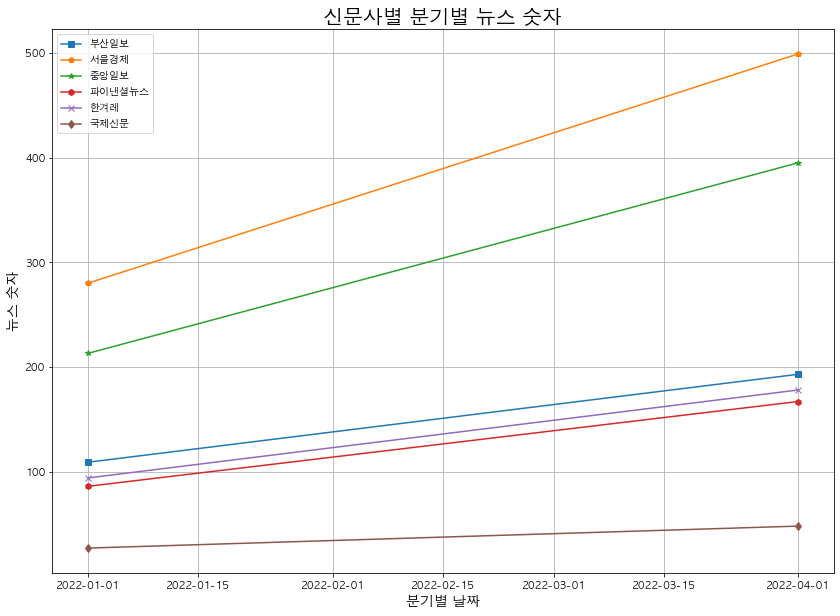

In [40]:
plt.rc('font', family='AppleGothic') 
plt.rcParams['axes.unicode_minus'] = False 
plt.rcParams['axes.grid'] = True 
plt.rcParams["figure.figsize"] = (14,10)
plt.plot(total.index, total.부산일보, marker='s') # 'dashed'
plt.plot(total.index, total.서울경제, marker='p') # solid
plt.plot(total.index, total.중앙일보, marker='*') # dotted
plt.plot(total.index, total.파이낸셜뉴스, marker='h')
plt.plot(total.index, total.한겨레, marker='x')
plt.plot(total.index, total.국제신문, marker='d')

plt.title('신문사별 분기별 뉴스 숫자', fontsize=20) 
plt.ylabel('뉴스 숫자', fontsize=14)
plt.xlabel('분기별 날짜', fontsize=14)
plt.legend(['부산일보','서울경제','중앙일보', '파이낸셜뉴스','한겨레','국제신문'], loc='best')
plt.show()

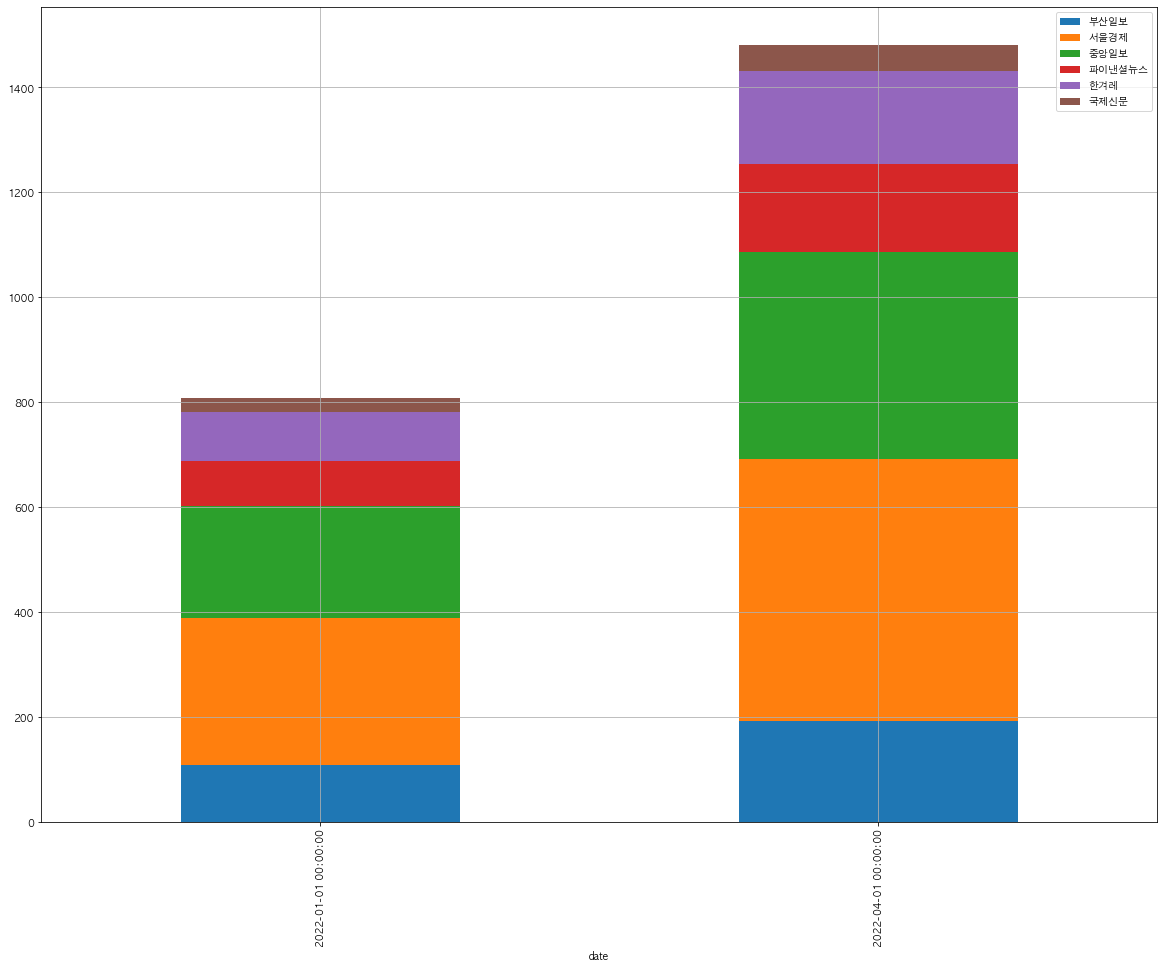

In [41]:
ax = total.plot.bar(stacked=True, figsize=(20,15))

{'미국': 1219, '한국': 1026, '온라인': 613, '넷플릭스': 571, '메타버스': 555, '삼성전자': 536, '게임': 515, '이용자': 435, '코로나19': 408, '서울': 397, '이정재': 384, '스마트폰': 368, '시상식': 366, 'tv': 362, '중국': 347, '관계자': 335, '만큼': 328, '정호연': 326, '갤럭시': 324, '우크라이나': 321, '러시아': 315, '블록체': 302, '소비자': 278, '메타': 277, '넥슨': 275, '일본': 270, 'gos': 264, 'nft': 245, '게임사': 245, '삼성': 245}


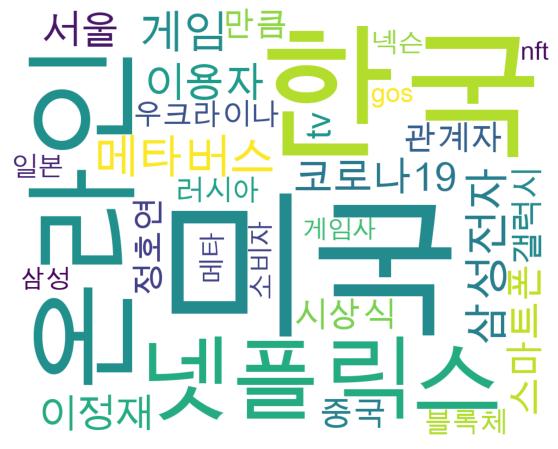

In [44]:
df['date'] = pd.to_datetime(df['일자'].astype(str), format='%Y%m%d')

df_qy8=df.query("date >= '2022-01-01' and date <='2022-03-31'")

new_data=df_qy8['특성추출(가중치순 상위 50개)'].values.tolist()
keyword=[] 
# 특성추출 컬럼안에 있는 문장들을 분리하여 단어별로 다 저장
for i in new_data:
    for y in i.split(','):
        keyword.append(y)
        
#단어별 빈도수 계산
from collections import Counter
count=Counter(keyword)
tags = count.most_common(30)
print(dict(tags))

#워드클라우드를 이용한 단어 빈도수 시각화
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# font_path = 'c:/windows/fonts/malgun.ttf'
font_path = '/Library/Fonts/Arial Unicode.ttf' # mac

wc = WordCloud(font_path=font_path,background_color='white', width=1000, height=800)
cloud = wc.generate_from_frequencies(dict(tags))
plt.figure(figsize=(10,8))
plt.axis('off')
plt.imshow(cloud)

In [45]:
new_data=df_qy8['키워드'].values.tolist()
keyword=[]
nouns=''
for i in new_data:
    for y in i.split(','):
        nouns +=y+' '
    keyword.append(nouns)
    nouns=''
keyword

['한국 호구 중국 비위 애플 애플 중국 비위 잔치 애플 중국 비위 혈안 한국 찬밥 중국 비위 한국 시장 홀대 지적 중국 시장 한국 앱스토어 애플 앱마켓 중국앱들 선전 매출 달성 시장 스마트폰 최대 중국 구애작전 중국 전략 글로벌 모바일 데이터 업체 센서 타워 Censor Tower 애플 앱스토어 게임 제외 상위 135억 달러 16조 매출 전년 달러 31% 상승 역대 최고 기록 센서타워 설명 경쟁사 구글 플레이 스토어 48억 달러 압도 규모 애플 앱스토어 역대 매출 기여 상위 리스트 중국앱 다수 포진 텐센트비디오 아이치 QQ뮤직 유쿠 youku 중국앱 이름 구글 플레이스토어 상위 목록 중국 대조적 중국인들 아이폰 구매 급증 앱스토어 애플 중국인들 지갑 수혜 풀이 중국 아이폰13 출시 애플 4분기 21.7% 시장점유율 역대 최고 시장 점유 달성 중국 1위 아이폰12 쌍끌 호조 애플 질주 중국 선전 삼성전자 1위 지난 세계 스마트폰 판매 탈환 애플 그동안 애국 소비 성향 중국인 겨냥 비위 주력 결과 애플 지난달 아시아 최대 명절 아이폰 Pro 촬영 영화 공개 제목 중국 Chinese 표현 논란 업계 중국 애플 노골적 마케팅 전략 지적 시장 한국 사실 찬밥 출시 한국 아이폰 출시 출시국 제외 대표적 아이폰 구매 소비자 수신 불량 호소 상황 애플 피해자 구제 후속 조치 안내 비난 애플 한국 매출 0.9% 법인세 논란 세계 매출 대비 평균 법인세 비중 4% 비교 4분 수준 의원 과학 기술정보방송통신위원회 양정숙 애플코리아 매출 원가 과도 영업이익 영업이익률 세금 회피 기업들 글로벌 기업 단골 수법 지적 ',
 '장병규 임직원 원어치 자사주 의장 장병규 크래프톤 자회사 임직원 230억 규모 자사주 공모 대비 주가 저평가 자신감 반영 풀이 전자공시시스템 금융 감독원 전자 공시 의장 규모 자사 장내매수 의장 17일 18일 1만 1만 장내매수 매입 규모 100억 2주 200억 어치 자사주 의장 컨퍼런스콜 실적 준비 시도들 사업 확장 성장성 기업 가치 성장 자신 말씀 주가 중장

In [46]:
#TF-IDF 계산
from sklearn.feature_extraction.text import TfidfVectorizer
#TF-IDF vectorizer
tfv = TfidfVectorizer(ngram_range = (1,1))
#Transformation
vec_text = tfv.fit_transform(keyword)
print(vec_text)

  (0, 43559)	0.056601039165770535
  (0, 24141)	0.05812980446145517
  (0, 20460)	0.02041135544575564
  (0, 20476)	0.034472557324221574
  (0, 80020)	0.04969850890202891
  (0, 42062)	0.046789997860591945
  (0, 51529)	0.05614768579952263
  (0, 51528)	0.03928220733095073
  (0, 16967)	0.03649469990341332
  (0, 53921)	0.049106380972009235
  (0, 48701)	0.0658128974334494
  (0, 49242)	0.07502475570112827
  (0, 20401)	0.06452034479310292
  (0, 17066)	0.038656595630114365
  (0, 56001)	0.03817732263041282
  (0, 43851)	0.02561177644984167
  (0, 4174)	0.056601039165770535
  (0, 37817)	0.033151532687943124
  (0, 38153)	0.03434050743379554
  (0, 74355)	0.03367943393065135
  (0, 24887)	0.025834451869873085
  (0, 35150)	0.12146090381106574
  (0, 37852)	0.04149986382670521
  (0, 47996)	0.04021830790235506
  (0, 63621)	0.03344069909308772
  :	:
  (5655, 57613)	0.028107612882767447
  (5655, 43605)	0.03134844818877074
  (5655, 13498)	0.08125971503198237
  (5655, 14815)	0.030404681591638564
  (5655, 25314)	0

In [47]:
#Features
words = tfv.get_feature_names()
print(words)

['00', '000', '000m', '000mah', '000t', '000개', '000달러', '000만', '000명', '000억', '000여', '000여장', '000원', '000잔', '000주', '000회', '007', '009매', '00년', '01', '017', '017매', '01년', '01달러', '01배', '01학번', '02', '023', '02년', '03', '03개', '03년', '04', '0416', '04년', '04세', '05', '051', '05달러', '05배', '05이더리움', '05점', '06', '061', '064', '067매', '06달러', '07', '072매', '07년', '07달러', '07포인트', '08', '081명', '08달러', '08이더리움', '08포인트', '09', '096단계', '099', '099점', '0g', '0개발', '0국면', '0달러', '0대', '0명', '0배', '0석', '0선', '0세', '0스텝', '0승', '0시', '0시대', '0시부', '0엔', '0완승', '0원', '0점', '10', '100', '1000', '1000m', '1000ml', '1000nit', '1000t', '1000개', '1000골드', '1000년', '1000니트', '1000달러', '1000마리', '1000만', '1000명', '1000배', '1000브이벅스', '1000억', '1000여', '1000여개', '1000여그루', '1000여명', '1000여종', '1000원', '1000인', '1000잔', '1000점', '1000조', '1000포인트', '1000회', '1001', '1001원', '1004명', '1005회', '1006회', '1007억', '1007회', '1008회', '1009억', '100fps', '100g', '100km', '100m', '100mbps', '100ml', '1

In [48]:
words[5748]

'88'

In [49]:
#KMeans 계산
from sklearn.cluster import KMeans
## K Means Clustering
kmeans = KMeans(n_clusters = 4, n_init = 17, tol = 0.01, max_iter = 200)
#Fitting
kmeans.fit(vec_text)

KMeans(max_iter=200, n_clusters=4, n_init=17, tol=0.01)

In [50]:
## Transforming Numbers Back To Words
common_words = kmeans.cluster_centers_.argsort()
print(common_words)
print(len(common_words[0]))

[[40322 52752 52751 ... 41700 39673  8177]
 [70831 26122 26101 ...  9695 70563 14402]
 [    0 53068 53067 ...  9818 21475 22900]
 [    0 53286 53285 ... 52313 34561 57101]]
80645


In [52]:
## Transforming Numbers Back To Words
common_words = kmeans.cluster_centers_.argsort()[:,-1:-11:-1]

word_header = ['삼성전자 이슈', '게임 플랫폼', '넥슨', '오징어 게임']

for num, centroid in enumerate(common_words):
    print(word_header[num] + ' : ' + ', '.join(words[word] for word in centroid))

삼성전자 이슈 : gos, 삼성전자, 성능, 갤럭시, 스마트폰, 논란, 업데이트, 주주, 발열, 시리즈
게임 플랫폼 : 게임, 콘텐츠, nft, 메타버스, 대표, 러시아, 기업, 플랫폼, 시장, 서비스
넥슨 : 넥슨, 김정주, nxc, 이사, 고인, 창업자, 별세, 대표, 창업, 창업주
오징어 게임 : 이정재, 배우, 오징어, 정호연, 수상, 시상식, 미국, sag, 드라마, 주연
